# Naive Bayes Classifier
This model assumes the independent fitures.

### Bayes Theorem

$\large{P(y|x) = \frac{p(y)}{p(x)} P(x|y)}$

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Fruits Table

Lets create a sample data

In [27]:
Data = [{"fruit": "mango","ripen":34,"rotten": 44, "green":64},\
       {"fruit": "apple","ripen":54,"rotten": 63, "green":73},\
       {"fruit": "banana","ripen":66,"rotten": 40, "green":75}]

In [28]:
DF = pd.DataFrame(Data)
DF = DF.set_index('fruit')

In [29]:
DF

,green,ripen,rotten
fruit,,,
mango,64,34,44
apple,73,54,63
banana,75,66,40


#### Questions:
Lets try to find the following quantities

```
p(mango|green) = ?
--------------------
p(mango) = ? p(green) = ?

p(green|mango) = ?
```

Lets find the margin sums

In [31]:
DF['margin'] = DF.sum(axis=1)

In [32]:
DF

,green,ripen,rotten,margin
fruit,,,,
mango,64,34,44,142
apple,73,54,63,190
banana,75,66,40,181


In [64]:
c_sum = list(DF.sum(axis =0))
c_sum

[212, 154, 147, 513]

#### P(fruits)

In [63]:
p_fruits = DF['margin']/513
p_fruits

fruit
mango     0.276803
apple     0.370370
banana    0.352827
Name: margin, dtype: float64

In [66]:
p_class = np.array(c_sum[0:3])/513
p_class

array([0.41325536, 0.30019493, 0.28654971])

**We can verify the Bayes theorem**

```
P(y=G|f=M) = P(y=G)/P(f=M)*P(f=M|y=G)
```

In [1]:
print(64/142,((212/513)/(142/513))*(64/212))

0.4507042253521127 0.4507042253521127


### Classroom Data

In [122]:
N=1000

In [123]:
import random as rn

Lets generate a Classroom data for 1000 students with 10 subjects

In [124]:
DATA = []
for i in range(1000):
    data = {}
    for j in range(10):
        data.update({"subject_"+str(j) : rn.randint(33,100)})
    DATA.append(data)

Score Data Frame with ```pandas```

In [125]:
CRM = pd.DataFrame(DATA)
CRM.head()

,subject_0,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9
0,39,69,48,59,39,82,76,63,34,72
1,100,58,40,95,84,89,83,43,85,72
2,41,88,78,39,40,48,87,35,69,83
3,64,50,94,67,93,98,45,71,82,35
4,91,52,49,80,98,91,77,64,68,81


Marginal sum can be calculated with ```sum()``` function with ```axis=1```

In [126]:
CRM['r_total'] = CRM.sum(axis=1)

We can define a ```grader``` function to implement it in finding grade.

In [133]:
def grader(x):
    if x>400 and x<600:
        return "C"
    elif x>600 and x<800:
        return "B"
    elif x>800:
        return "A"
    else:
        return "D"

In [128]:
CRM['grade'] = CRM['r_total'].apply(grader)

This adds a ```grade``` column in the data frame.

In [129]:
CRM.head()

,subject_0,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,r_total,grade
0,39,69,48,59,39,82,76,63,34,72,581,C
1,100,58,40,95,84,89,83,43,85,72,749,B
2,41,88,78,39,40,48,87,35,69,83,608,B
3,64,50,94,67,93,98,45,71,82,35,699,B
4,91,52,49,80,98,91,77,64,68,81,751,B


Lets calculate the column sum in case we need it.

In [132]:
SSM = list(CRM.sum(axis=0))[0:-1]
SSM

[66608, 66116, 66553, 66964, 66390, 66736, 66071, 66438, 65886, 66155, 663917]

#### Questions: Find the following probability distribution

For a given score: X = [x0,x1,x2,x3,x4,x5,x6,x7,x8,x9]

```
P(G|X) = ?
-------------
P(X|G) = ?
P(X) = ?
P(G) = ?
```

#### Probability distribution of Grade: P(G)

In [131]:
CRM.groupby('grade')['subject_0'].count()/N

grade
A    0.010
B    0.836
C    0.150
D    0.004
Name: subject_0, dtype: float64

#### Probability Distribution of Scores: P(X)

$P(X) = \Pi_{i} P(x_{i}) = P(x_1)\times P(x_2)\times P(x_3)\times P(x_4)\times P(x_5)\times P(x_6)\times P(x_7)\times P(x_8)\times P(x_9) \times P(x_{10})$

In [120]:
import seaborn as sns
sns.set()

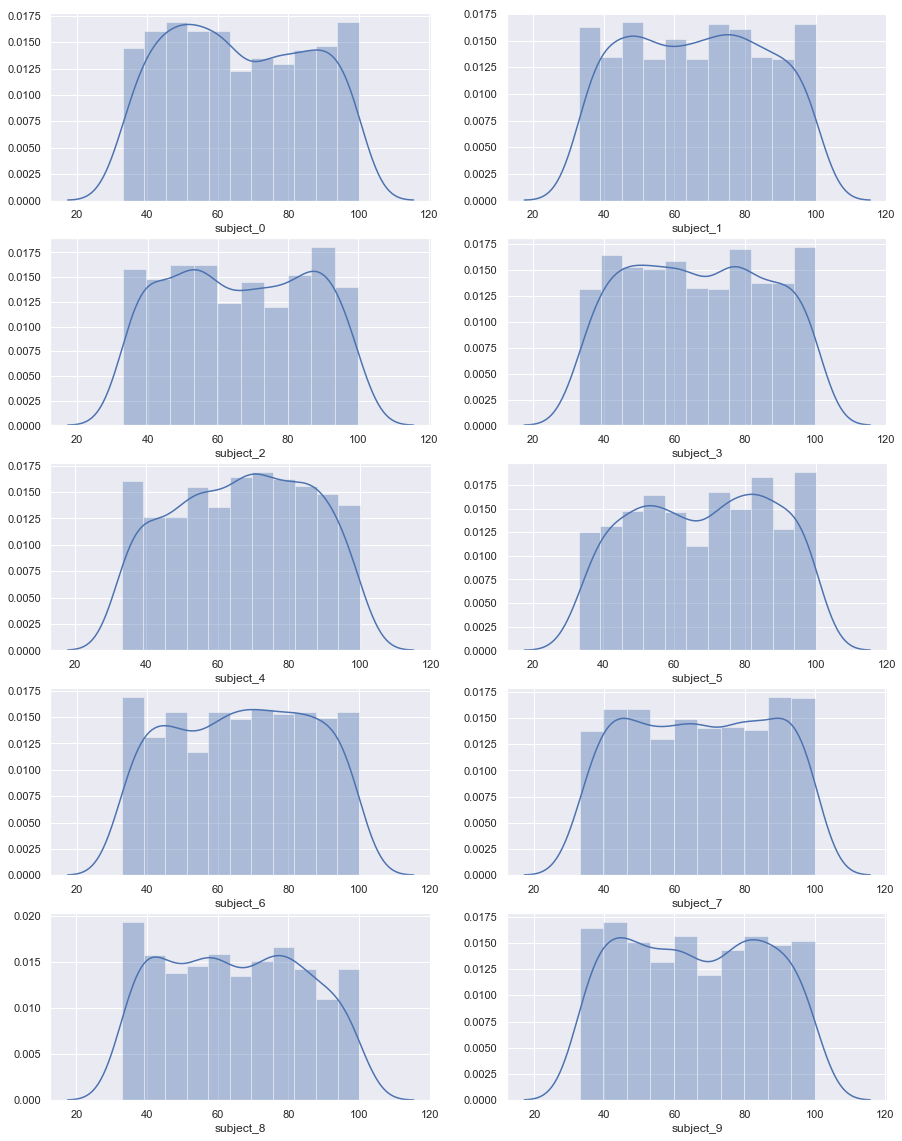

In [121]:
plt.figure(figsize = [15,20])
for k in range(10):
    plt.subplot(5,2,k+1)
    sns.distplot(CRM['subject_'+str(k)])
plt.show()

#### Probability distribution of scores for given grade:  P(X|G)

In [135]:
CRM_A = CRM[CRM['grade']=='A']
CRM_B = CRM[CRM['grade']=='B']
CRM_C = CRM[CRM['grade']=='C']
CRM_D = CRM[CRM['grade']=='D']

In [136]:
CRM_B.head()

,subject_0,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,r_total,grade
1,100,58,40,95,84,89,83,43,85,72,749,B
2,41,88,78,39,40,48,87,35,69,83,608,B
3,64,50,94,67,93,98,45,71,82,35,699,B
4,91,52,49,80,98,91,77,64,68,81,751,B
5,70,78,70,33,96,64,66,61,54,80,672,B


#### P(X|A)

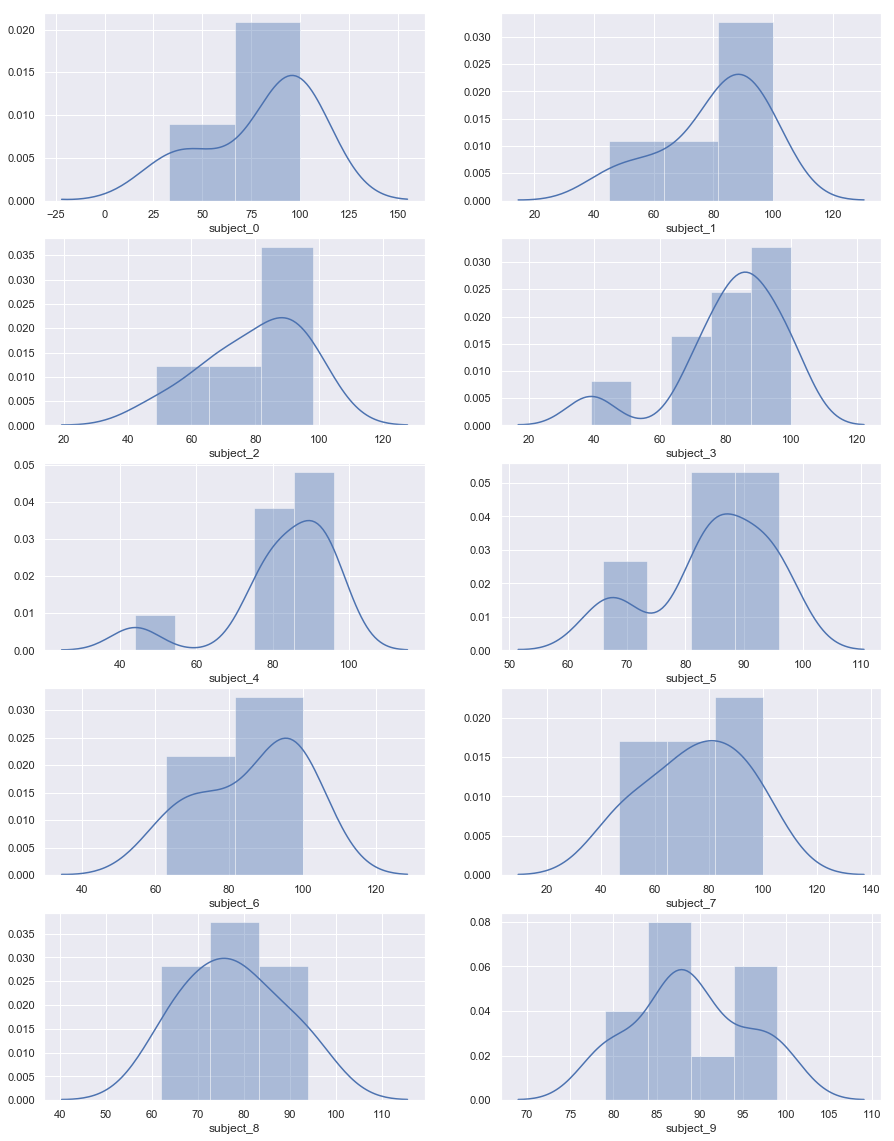

In [142]:
plt.figure(figsize = [15,20])
for k in range(10):
    plt.subplot(5,2,k+1)
    sns.distplot(CRM_A['subject_'+str(k)])
plt.show()

#### P(X|B)

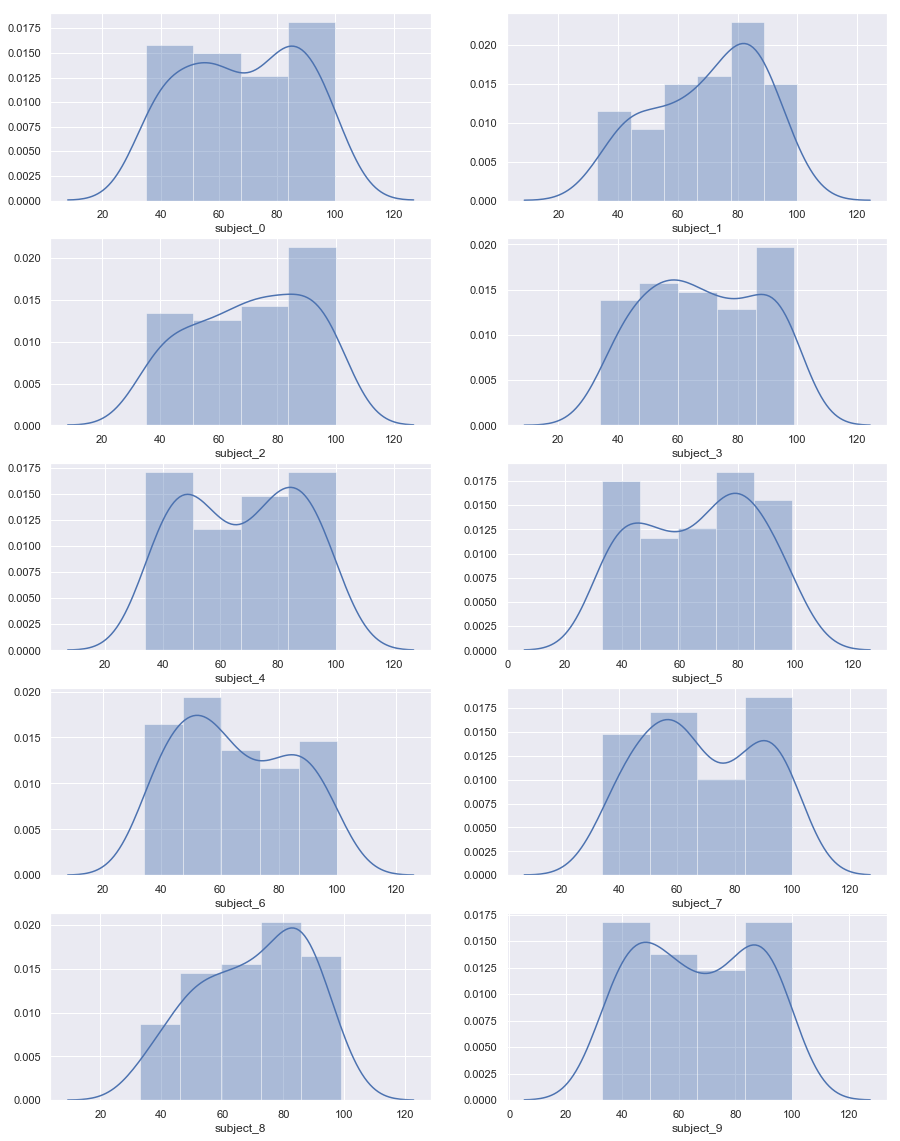

In [134]:
plt.figure(figsize = [15,20])
for k in range(10):
    plt.subplot(5,2,k+1)
    sns.distplot(CRM_B['subject_'+str(k)])
plt.show()

#### P(X|C)

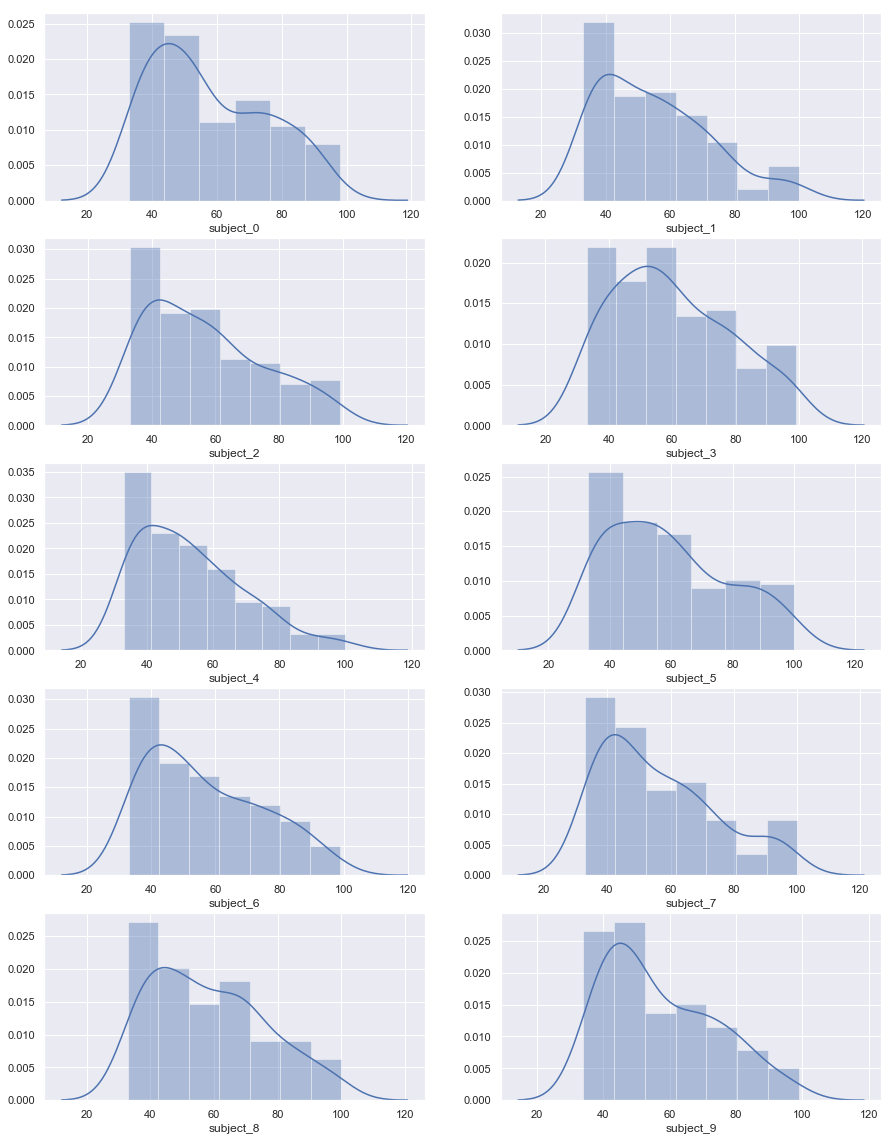

In [143]:
plt.figure(figsize = [15,20])
for k in range(10):
    plt.subplot(5,2,k+1)
    sns.distplot(CRM_C['subject_'+str(k)])
plt.show()

#### P(X|D)

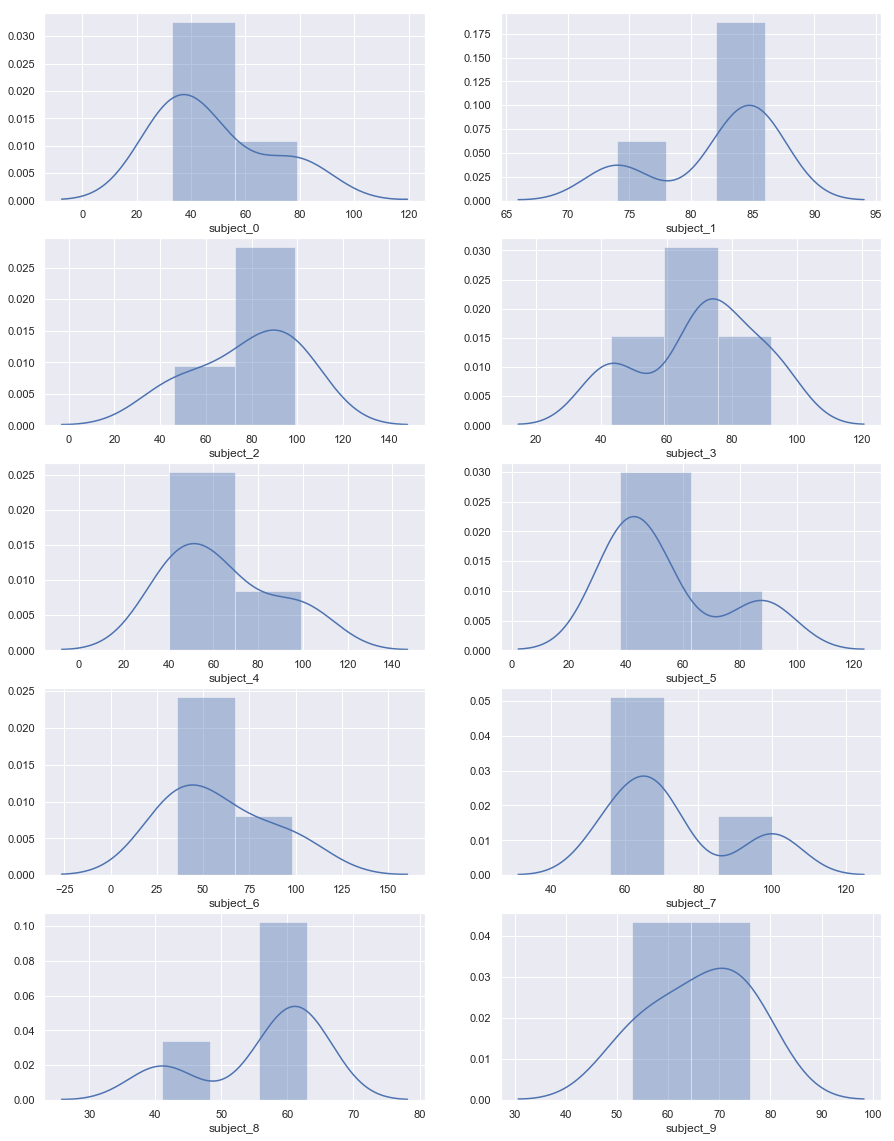

In [144]:
plt.figure(figsize = [15,20])
for k in range(10):
    plt.subplot(5,2,k+1)
    sns.distplot(CRM_D['subject_'+str(k)])
plt.show()

### Question: For a given score (X) find the probable Score

$\large{P(G|X) = \frac{P(G)}{P(X)} P(X|G)}$

In [93]:
xt = [ rn.randint(33,100) for i in range(10)]
xt

[74, 90, 97, 75, 34, 53, 71, 39, 41, 33]

- P(G=A|X=xt)
- P(G=B|X=xt)
- P(G=C|X=xt)
- P(G=D|X=xt)

In [ ]:
P(X|B) = (0.012*0.034,....)

In [ ]:
 P(G=B|X=xt) = P(B)/P(X)* P(X|B)

In [ ]:
(0.78/(0.011*0.013*0.023....))*(0.012*0.034,....)

### Naive Bayes Classifier

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/5f8f290c7c9010bb40a365587ec4c236b3d02ff8)

where 

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/58e7d135abe9883f49a4748e75756b33b3a5b621)

The Optimization step reads:

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/1eaed580cf7c29f044a9e517f1cd4a7dd69c4b1f)